In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%pprint off
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'

Pretty printing has been turned OFF


In [2]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [3]:
fpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_clean_0813.csv'

In [305]:
#### PART1: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})
#res.sort_values(by=['stim_id', 'id'], inplace=True)
print('before catch-based rejection:', res.shape)
res.tail()

######################### check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.iloc[1,].stim, df.shape[0])

########################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')
res

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

######################### drop bad subjects
res = res.loc[res['badsubject']=='N', ]
res = res.reset_index(drop=True)
print ('after catch-based rejection:', res.shape)
res[1:3]

before catch-based rejection: (4335, 20)
after catch-based rejection: (3802, 20)


,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
1,2,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0, 6, 0, 6, 6]",4,N
2,3,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0, 6, 0, 6, 6]",4,N


In [101]:
#################### create an average dict ###################### 
#del avg_df
stim_id_n = len(set(res['stim_id']))  ###i.e., 320

response_n = len(res.iloc[0]["response"])
print('# of questions:', response_n)
column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

avg_dict = {}
for i in range(1, stim_id_n+1): #loop over 320 verbs 
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean()) #mean rating for each attribute
    avg = [round(a,3) for a in avg]
    std = list(df_responses.std())
    std = [round(s,3) for s in std] #stdev of rating for each attribute
#     print (df.shape)
#     print (df_responses.shape)

    avg_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'NofResponse': df.shape[0], 'avg_ratings': avg, 'std_ratings':std} #avg_rating= mean for each attribute
avg_df = pd.DataFrame.from_dict(avg_dict, orient='index')
avg_df.head()

# of questions: 72


,stim,subject_ids,NofResponse,avg_ratings,std_ratings
1,live,"[206, 213, 223, 286, 266, 179, 5, 97, 123, 357...",12,"[2.25, 0.833, 0.167, 0.583, 0.333, 0.917, 0.58...","[2.05, 1.193, 0.389, 1.084, 0.651, 1.975, 0.99..."
2,speak,"[7, 435, 7, 19, 40, 374, 3, 531, 160, 341, 100...",14,"[0.857, 0.143, 0.071, 0.071, 0.429, 0.5, 1.071...","[1.351, 0.363, 0.267, 0.267, 0.852, 0.855, 1.3..."
3,listen,"[203, 122, 345, 105, 136, 684, 182, 114, 595, ...",12,"[1.833, 0.75, 1.083, 0.583, 0.833, 1.0, 1.083,...","[1.992, 1.865, 2.314, 1.165, 1.85, 1.859, 1.78..."
4,walk,"[6, 56, 423, 311, 523, 564, 258, 114, 1060, 23...",11,"[1.0, 0.455, 0.0, 0.091, 0.273, 0.364, 0.182, ...","[1.789, 1.036, 0.0, 0.302, 0.647, 0.809, 0.405..."
5,fly,"[269, 128, 369, 44, 10, 3, 201, 393, 235, 11, ...",13,"[2.769, 1.308, 1.385, 0.923, 1.308, 1.462, 2.5...","[2.351, 2.057, 2.063, 2.253, 2.175, 1.808, 1.8..."


In [94]:
df_responses

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72
0,2,2,3,0,0,1,1,1,1,1,0,1,1,0,1,2,1,0,0,0,2,3,1,1,1,1,0,0,1,1,1,1,1,1,1,3,2,3,2,2,2,1,2,2,3,3,3,4,3,3,4,3,4,3,4,1,4,1,4,3,3,4,4,2,1,4,5,1,3,3,3,2
1,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,1,1,1,0,0,0,6,0,0,0,1,4,0,0,0,1,1,6,5,3,2,1,1,1,6,0,6,0,5,0,5,2,1,5,5,3,0,6,5,3,2,0,5,3
2,1,0,1,0,0,4,0,3,3,3,1,3,1,2,1,0,0,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,0,0,0,2,3,5,3,5,2,4,3,0,5,0,4,0,4,0,3,1,1,2,1,3,0,4,2,2,0,0,5,4
3,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,3,0,0,1,0,3,3,2,6,5,1,5,3,4,0,3,0,6,0,5,3,3,4,2,1,0,2,6,1,5,2,3,1
4,3,0,0,0,1,4,0,2,1,1,5,2,1,1,1,0,0,0,0,0,3,5,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,0,0,2,2,3,1,6,4,3,4,1,0,1,0,6,0,5,0,3,4,2,4,3,1,0,5,5,2,4,6,6,4
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,3,5,1,3,1,0,3,0,3,0,3,0,3,2,0,3,4,0,0,0,5,0,3,1,3,2
6,0,4,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,1,2,3,1,0,2,0,1,0,0,0,0,1,1,2,5,2,0,3,5,0,1,3,4,2
7,1,0,0,0,0,0,0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,0,2,0,0,1,1,1,2,1,2,4,1,3,1,0,0,1,0,2,1,1,0,0,3,2,0,4,4,0,0,1,1,3
8,1,1,2,0,0,4,3,5,5,1,3,3,0,3,0,0,0,0,0,1,3,3,1,0,0,0,1,0,0,0,0,0,3,0,1,0,2,2,0,4,2,0,3,2,3,3,4,4,4,5,3,1,0,5,5,2,4,2,3,3,2,4,3,3,0,4,4,3,4,6,5,4
9,6,3,0,0,0,2,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,4,4,6,0,5,0,1,5,4,0,2,0,0,2,0,0,0,0,5,0,6,0,0,0,2,6,6,2,6,0,0,3,1,3,3,3,6,6,6,2,5,6,4,0,6,6,5,4,6,5,5


In [102]:
res.tail()

,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
3797,4330,114,build,1292,"[6, 0, 0, 3, 4, 0, 1, 6, 5, 2, 3, 6, 0, 0, 1, ...",2021-08-12 22:53:52,2021-08-12 23:02:54,"[4871, 7642, 3484, 6609, 7112, 5096, 9510, 492...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5192660,A1ZVJG3BKYHJWN,f,65,14,retailstorecashier,3776,1292,"[0, 6, 0, 6, 6]",4,N
3798,4331,103,shorten,1293,"[5, 5, 5, 5, 5, 6, 4, 6, 6, 5, 4, 3, 4, 4, 4, ...",2021-08-12 23:06:49,2021-08-12 23:40:48,"[667924, 14420, 20586, 4278, 2270, 6312, 9264,...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2285767,APG9EK6P41THO,m,48,16,NaN,3777,1293,"[0, 6, 0, 6, 6]",4,N
3799,4332,243,discover,1294,"[3, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, ...",2021-08-12 23:37:43,2021-08-12 23:47:34,"[1992, 1873, 1567, 3326, 2023, 3199, 1328, 270...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1553234,A4SQSL2ZCEU1,f,48,3,15,3778,1294,"[4, 6, 0, 6, 6]",4,N
3800,4334,198,decrease,210,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 5, 0, 4, 1, ...",2021-08-13 03:32:09,2021-08-13 03:37:55,"[1976, 4112, 2681, 2408, 2120, 7560, 8361, 344...","[1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...",8451568,A2LV5432PV1S39,m,34,16,DeputyCourtClerk,3780,210,"[0, 6, 0, 6, 6]",4,N
3801,4335,190,suffocate,354,"[2, 0, 1, 3, 0, 0, 0, 3, 3, 3, 2, 0, 3, 4, 3, ...",2021-08-12 12:43:47,2021-08-13 10:28:09,"[10243, 6059, 10749, 7117, 21965, 5991, 5651, ...","[1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...",2647805,APZQ9ADUXTS7N,f,66,14,NaN,3781,354,"[0, 6, 0, 6, 6]",4,N


In [260]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

#update res_dict so as to include "subject-to-group" correlation
#res_dict = res.set_index('id').to_dict(orient='index')
res_dict = res.to_dict(orient='index')

for k, v in res_dict.items():
    response = v['response']
    check = v['stim'] == avg_dict[v['stim_id']]['stim']
    if check == False:
        print ('something wrong!')
    group_avg = avg_dict[v['stim_id']]['avg_ratings']
    v['corr'] = round(pearsonr(response, group_avg)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])
#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index') #res updated

### find HITs where the response is constant (i.e., subject hitting the same button all the time)
res_upd[res_upd['corr'].isna()]
print('# of rows before dropping:', res_upd.shape[0])
res_upd = res_upd.dropna(subset=['corr'])
print('# of rows after dropping:', res_upd.shape[0])

### write res_upd to csv 
#res_upd.to_csv(savepath + '/HITs_clean_with_correlations_0813.csv', index=False) ### clean HITs after dropping catch-failed HITs

# min(res_upd['corr_fisher'].values.tolist())
# res_upd2= res_upd.drop(columns=["RT", "buttonpress","turkcode","subject_num", "catch_subject_id","occupation"])
# res_upd2.loc[res_upd['badsubject']=='Y', ].sort_values(by='corr')

# of rows before dropping: 3802
# of rows after dropping: 3801


/Users/songkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [98]:
# res_dict = res.set_index('id').to_dict(orient='index')
# len(res_dict.keys())

# of responses below r= 0.4 : 337
before: (3801, 22)
after: (3464, 22)


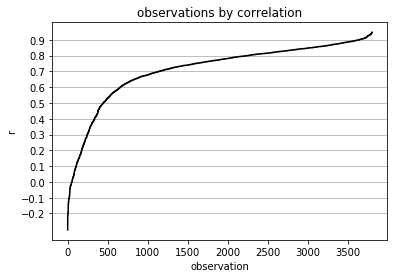

In [261]:
###### plot histogram
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# res_upd.hist(column='corr', cumulative=True, bins=150, ax=ax)
# fig.savefig(savepath+'/subj_to_group_corr_hist_0813.png')


###### plot cumulative distribution of corr ("sort observation by corr")
corr = sorted(res_upd['corr'].tolist())
#plt.step(x=corr, y=np.arange(len(corr)))
plt.step(x=np.arange(len(corr)), y=corr, c="black")
plt.title("observations by correlation")
plt.xlabel("observation")
plt.ylabel("r")
plt.yticks(np.arange(-0.2, 1, 0.1))
plt.grid(axis="y")
plt.savefig(savepath+'/observations_by_correlation_0813.png')


#### drop responses where r < threshold
thre = 0.4
below_thre = res_upd[res_upd['corr']< thre].shape
print('# of responses below r=', thre, ':', below_thre[0])
dropind = res_upd[res_upd['corr'] < thre].index.tolist()
#res_upd.drop([0,1])
print('before:', res_upd.shape)
res_upd.drop(dropind, inplace=True)
print('after:', res_upd.shape)

In [ ]:
#####testing
### data = np.random.rand(1000)
#sorted_data = np.sort(data)
#sorted_data
#np.arange(sorted_data.size)
#plt.step(sorted_data, np.arange(sorted_data.size))
#plt.step([1,5,10,15,20,25,30],[1,2,3,4,5,6,7])

In [262]:
###### Part 2: find out bad words
quesf = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [263]:
verb_ques

,fname,question
46,Caused,To what extent does this verb describe an even...
67,Boundedness,Some verbs refer to an activity that could con...
68,Actor,To what extent does this verb describe somethi...
69,Done to Something Else,To what extent does this verb describe an acti...
70,State of Being,To what extent does this verb describe a <i>ch...
71,Require Energy Input,To what extent is physical or mental energy re...


In [293]:
## export data (for each verb, one response for each feature)

res_clean = res_upd[["stim_id", "stim", "subject_id", "response", "correctN", "corr_fisher"]]

new_column= list(range(response_n)) #[0,1,2,...71]
res_clean[new_column] = pd.DataFrame(res_sub.response.tolist(), index= res_sub.index)
#res_clean.head()
# res_clean = res_clean[["stim_id", "stim", "subject_id", "correctN", "corr_fisher", 46, 67, 68, 69, 70, 71]]
res_clean.head()

d = dict()
#for i in [46,67,68,69,70,71]:
for i in range(0,response_n):
    d[i] = q_dict[i]['fname']

res_clean = res_clean.rename(columns=d)
res_clean.head()

##export res_sub
# savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
# res_clean.to_csv(savepath+'/clean_HITs_72features_0813.csv', index=False) ##HITs that only include crucial info
res_clean[res_clean['stim_id']==1]

,stim_id,stim,subject_id,response,correctN,corr_fisher,Vision,Bright,Dark,Color,Pattern,Large,Small,Motion,Biomotion,Fast,Slow,Shape,Face,Body,Touch,Hot,Cold,Smooth,Rough,Light,Heavy,Pain,Audition,Loud,Low,High,Sound,Music,Speech,Taste,Smell,Head,UpperLimb,LowerLimb,Practice,Landmark,Path,Scene,Near,Toward,Away,Number,Time,Duration,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Benefit,Harm,Pleasant,Unpleasant,Happy,Sad,Angry,Disgusted,Fearful,Surprised,Drive,Needs,Attention,Arousal,Boundedness,Actor,Done to Something Else,State of Being,Require Energy Input
177,1,live,206,"[6, 4, 1, 3, 2, 6, 2, 6, 6, 5, 1, 4, 6, 6, 4, ...",4,0.996215,6,4,1,3,2,6,2,6,6,5,1,4,6,6,4,2,1,1,2,1,1,5,5,1,1,1,3,2,5,3,4,6,5,5,6,6,5,3,3,4,5,1,5,5,6,3,6,6,6,6,5,6,6,6,6,6,1,6,3,3,1,6,4,5,6,5,6,5,6,4,6,6
183,1,live,213,"[3, 0, 0, 0, 0, 1, 0, 1, 4, 2, 3, 2, 2, 5, 3, ...",4,1.389224,3,0,0,0,0,1,0,1,4,2,3,2,2,5,3,0,0,0,0,0,0,3,3,0,0,0,0,0,3,3,0,3,3,1,6,4,1,1,1,0,0,1,3,3,3,1,4,6,3,5,3,6,5,6,0,6,0,3,1,0,0,0,0,4,6,2,4,3,1,0,6,6
192,1,live,223,"[2, 2, 0, 2, 1, 0, 0, 5, 5, 3, 1, 3, 4, 5, 3, ...",4,0.838474,2,2,0,2,1,0,0,5,5,3,1,3,4,5,3,1,0,0,1,0,0,0,4,2,0,2,1,4,2,0,0,1,2,2,4,2,1,1,0,0,0,0,0,4,2,3,3,3,4,5,4,3,4,0,1,3,0,2,1,1,0,1,2,5,6,4,6,4,1,1,5,3
691,1,live,286,"[0, 0, 0, 0, 0, 0, 1, 0, 5, 0, 3, 2, 1, 3, 1, ...",4,1.267064,0,0,0,0,0,0,1,0,5,0,3,2,1,3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,6,0,3,4,0,1,0,0,1,4,5,1,4,5,3,6,1,6,4,3,1,5,0,3,1,0,0,0,1,3,4,3,4,1,3,0,4,6
909,1,live,266,"[2, 1, 0, 0, 0, 0, 0, 4, 6, 2, 1, 0, 4, 6, 2, ...",4,1.238405,2,1,0,0,0,0,0,4,6,2,1,0,4,6,2,1,0,0,1,0,0,2,3,0,0,0,1,0,6,1,2,6,5,5,6,1,1,0,0,0,1,0,0,5,4,2,3,5,3,6,1,6,3,6,0,6,0,6,1,0,0,1,0,6,6,3,1,6,5,1,6,5
1041,1,live,179,"[3, 1, 0, 2, 0, 0, 3, 5, 5, 2, 4, 3, 2, 3, 2, ...",4,1.079463,3,1,0,2,0,0,3,5,5,2,4,3,2,3,2,0,0,0,0,0,0,0,2,1,1,3,2,0,5,2,1,4,5,4,6,2,1,1,1,1,0,0,0,0,5,1,4,4,5,6,2,6,4,3,0,5,1,3,1,2,1,0,0,2,6,1,3,0,4,1,4,3
1400,1,live,5,"[1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 1, 0, ...",4,1.159878,1,0,0,0,0,0,0,3,3,0,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,3,3,2,3,0,3,3,6,0,6,6,3,0,6,0,5,0,0,0,0,0,3,6,0,2,3,1,0,3,1
2067,1,live,97,"[2, 1, 0, 0, 1, 0, 1, 3, 3, 0, 0, 4, 2, 2, 0, ...",4,0.759869,2,1,0,0,1,0,1,3,3,0,0,4,2,2,0,1,2,3,3,0,0,0,0,1,0,0,1,1,3,2,1,3,0,1,6,6,1,5,0,0,0,2,1,1,6,4,4,4,6,6,4,5,4,6,0,2,1,0,0,1,1,0,0,3,3,0,4,0,5,0,0,3
2255,1,live,123,"[2, 1, 1, 0, 0, 0, 0, 1, 5, 1, 1, 1, 3, 5, 0, ...",4,1.150743,2,1,1,0,0,0,0,1,5,1,1,1,3,5,0,0,0,0,0,1,0,2,0,0,0,0,0,0,3,0,0,1,5,3,5,3,3,4,1,0,0,1,5,4,6,1,1,1,3,5,5,5,3,3,1,5,1,5,1,1,0,1,1,5,5,1,3,3,5,1,3,1
2638,1,live,357,"[6, 0, 0, 0, 0, 4, 0, 3, 6, 5, 1, 0, 3, 3, 0, ...",4,0.805319,6,0,0,0,0,4,0,3,6,5,1,0,3,3,0,3,1,0,0,5,3,6,6,0,0,0,1,0,4,3,6,6,4,4,4,0,5,1,5,0,0,0,4,4,6,2,3,3,5,6,4,6,6,2,0,5,0,6,3,0,1,1,0,3,4,0,5,5,2,2,3,3


In [406]:
df_sel = res_clean.loc[res_clean['stim_id']==i, ]
df_sel = df_sel.drop(columns=['subject_id', 'response', 'correctN', 'corr_fisher'])
df_sel.head()

,stim_id,stim,Vision,Bright,Dark,Color,Pattern,Large,Small,Motion,Biomotion,Fast,Slow,Shape,Face,Body,Touch,Hot,Cold,Smooth,Rough,Light,Heavy,Pain,Audition,Loud,Low,High,Sound,Music,Speech,Taste,Smell,Head,UpperLimb,LowerLimb,Practice,Landmark,Path,Scene,Near,Toward,Away,Number,Time,Duration,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Benefit,Harm,Pleasant,Unpleasant,Happy,Sad,Angry,Disgusted,Fearful,Surprised,Drive,Needs,Attention,Arousal,Boundedness,Actor,Done to Something Else,State of Being,Require Energy Input
199,320,overwhelm,2,2,3,0,0,1,1,1,1,1,0,1,1,0,1,2,1,0,0,0,2,3,1,1,1,1,0,0,1,1,1,1,1,1,1,3,2,3,2,2,2,1,2,2,3,3,3,4,3,3,4,3,4,3,4,1,4,1,4,3,3,4,4,2,1,4,5,1,3,3,3,2
201,320,overwhelm,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,1,1,1,0,0,0,6,0,0,0,1,4,0,0,0,1,1,6,5,3,2,1,1,1,6,0,6,0,5,0,5,2,1,5,5,3,0,6,5,3,2,0,5,3
643,320,overwhelm,1,0,1,0,0,4,0,3,3,3,1,3,1,2,1,0,0,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,0,0,0,2,3,5,3,5,2,4,3,0,5,0,4,0,4,0,3,1,1,2,1,3,0,4,2,2,0,0,5,4
781,320,overwhelm,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,3,0,0,1,0,3,3,2,6,5,1,5,3,4,0,3,0,6,0,5,3,3,4,2,1,0,2,6,1,5,2,3,1
936,320,overwhelm,3,0,0,0,1,4,0,2,1,1,5,2,1,1,1,0,0,0,0,0,3,5,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,0,0,2,2,3,1,6,4,3,4,1,0,1,0,6,0,5,0,3,4,2,4,3,1,0,5,5,2,4,6,6,4


In [425]:
#### create df of standard deviation for each word (i.e., word x features)
res_clean = pd.read_csv(savepath+'/clean_HITs_72features_0813.csv')
stim_ids = sorted(res_clean['stim_id'].unique())

#create new empty df 
orig_cols = res_clean.columns.values.tolist()
rmlist = ['subject_id', 'response', 'correctN', 'corr_fisher']
new_cols = [o for o in orig_cols if o not in rmlist]

df_sd = pd.DataFrame(columns=new_cols)

# iterate over 320 verbs and append new row to df_sd
for i in stim_ids:
    df_sel = res_clean.loc[res_clean['stim_id']==i, ]
    stim_id = df_sel['stim_id'].unique()[0]
    stim = df_sel['stim'].unique()[0]

    df_features = df_sel.drop(columns=['stim_id', 'stim', 'subject_id', 'response', 'correctN', 'corr_fisher'])
    new_row = round(df_features.std(),2).to_frame().T #row of standard deviations
    new_row['stim_id'] = stim_id
    new_row['stim'] = stim
    new_row['responseN'] = df_sel.shape[0]
    df_sd = df_sd.append(new_row, sort=False)
    
    
# add mean SD for each row
df_sd_fin = df_sd.copy() #fin = final
df_sd_fin['mean_72feat_SD'] = round(df_sd_fin.mean(numeric_only=True, axis=1),2)
sixfeatures = ["Caused", "Boundedness", "Actor", "Done to Something Else", "State of Being", "Require Energy Input"]
df_sd_fin['mean_6feat_SD'] = round(df_sd_fin.loc[:, sixfeatures].mean(axis=1),2)
df_sd_fin['responseN'] = df_sd_fin['responseN'].astype(int)
df_sd_fin = rearrange_col(df_sd_fin, 'responseN', 'stim')
df_sd_fin = rearrange_col(df_sd_fin, 'mean_72feat_SD', 'responseN')
df_sd_fin = rearrange_col(df_sd_fin, 'mean_6feat_SD', 'mean_72feat_SD')

#df_sd_fin
df_sd_fin.to_csv(savepath + '/clean_320verbs_SD.csv', index=False)

In [ ]:
#########PART3: integrate SD dataframe with verblist
#sdpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/SD_by_word_and_feature.csv'
sdpath = savepath + '/clean_320verbs_SD.csv'
listpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

df_sd = pd.read_csv(sdpath, index_col=0)
df_list = pd.read_csv(listpath)
df_list = df_list.loc[df_list['in']==1]

###merge of verblist
df_sd_upd = pd.merge(left=df_sd, right=df_list, left_on= 'word', right_on='Lemma')

#### clean up merged df
df_sd_upd.drop(columns=['Lemma', 'badverb', 'GrandIndex', 'in', 'whyexcluded', 
                        'abs_marginality', 'rel_marginality', 'SynClassLitrt', 'SynClassSK', 'good'], inplace=True)


#### add <mean (subject-to-group) correlation to df_sd_upd ##### 
corr_raw = pd.read_csv(savepath + '/HITs_clean_with_correlations.csv')
corr_raw = corr_raw[["stim_id", "stim", "subject_id", "corr_fisher"]]
corr_raw['corr_fisher'] = corr_raw['corr_fisher'].round(decimals=3)
corr_dict = {}
for i in range(1,321):
    df_sel = corr_raw.loc[corr_raw['stim_id']==i]
    stim_id = df_sel.iloc[0]['stim_id']
    word = df_sel.iloc[0]['stim']
    corr_list = df_sel['corr_fisher'].values.tolist()
    corr_list.sort(reverse=True)
    corr_list = [round(c,2) for c in corr_list]
    mean_corr = round(df_sel['corr_fisher'].mean(), 2)
    d_add = {'stim_id': stim_id, 'word': word, 'corr_list':corr_list, 'mean_fcorr':mean_corr}
    corr_dict[i] = d_add
    
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')


df_sd_out = pd.merge(left=df_sd_upd, right=corr_df, on='word')
df_sd_out = rearrange_col(df_sd_out, 'mean_fcorr', 'meanSD')
df_sd_out = rearrange_col(df_sd_out, 'corr_list', 'mean_fcorr')
######

### write to csv
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
df_sd_out.to_csv(savepath + '/list320_with_sd_correlation.csv', index=False)


## plotting
#df_sd_out.plot(x="stim_id", y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["meanSD"], kind="hist")

df_sd_out.plot(x="SynClass", y="mean_fcorr", kind="scatter")

In [ ]:
df_sd_out.head()

In [ ]:
df_sd_upd.head()

In [ ]:
corr_df.head()

In [ ]:
df_sd_upd.head()

In [ ]:
i=1
df = corr_raw.loc[corr_raw['stim_id']==i]
corr_list = df['corr_fisher'].values.tolist()
corr_list = [round(c,2) for c in corr_list]
mean_corr = round(df['corr_fisher'].mean(), 3)

In [ ]:
df

In [ ]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].mean()

In [ ]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].values.tolist()

In [ ]:
df_sd_upd.head()

In [ ]:
## add "mean (subject-to-group) correlation"
df_sd_upd['meanCorrelation']


In [ ]:
df_sd_upd.head()

In [ ]:
df_sd_upd.head()

In [ ]:
df_sd.head()

In [ ]:
#df_sd_upd['word'].equals(df_sd_upd['Lemma'])
set(df_sd_upd['in'].values.tolist())
#df['Score A'].equals(df['Score B'])

In [ ]:
# list_1 = [1, 1, 1, 1]
# list_2 = [-1, -1, -1, -1]
# list_3 = [1, 3, 5, 7]
# list_4 = [0,0,0,100]
# dfx=pd.DataFrame({"list_1":list_1,"list_2":list_2,"list_3":list_3,"list_4":list_4})
# dfx

In [ ]:
# t1= '0_6_0_6_6'
# t1.split('_')

# testlist = ['5', '7', '3', '0', '6', '0', '3', '1', '0']
# ['0' if t=='7' else t for t in testlist]
#new_prices = [round(price - (price * 10 / 100), 2) if price > 50 else price for price in prices]

In [ ]:
####### spread responses into separate columns
# df_test = res[["id", "stim_id", "response"]]

#print ('before spreading:', res.shape)

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# res[column] = pd.DataFrame(res.response.tolist(), index=res.index)

# print ('after spreading:', res.shape)

#res.tail()

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)

In [ ]:
# for r in range(len(res_upd.iloc[0]['response'])):
#     print (r, res_upd.iloc[0]['response'][r])

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p